In [1]:
import time
import numpy as np
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import RIGHT_ONLY
from agent import DQNAgent
from wrappers import wrapper

# Build env (first level, right only)
env = gym_super_mario_bros.make('SuperMarioBros-1-1-v0')
env = JoypadSpace(env, RIGHT_ONLY)
env = wrapper(env)

# Parameters
states = (84, 84, 4)
actions = env.action_space.n

# Agent
agent = DQNAgent(states=states, actions=actions, max_memory=100000, double_q=True)

# Episodes
episodes = 10000
rewards = []

# Timing
start = time.time()
step = 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 


Instructions for updating:
Use `tf.cast` instead.

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








In [2]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

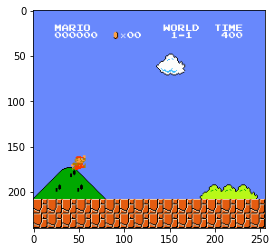

In [ ]:
for e in range(episodes):

    # Reset env
    state = env.reset()
    
    img = plt.imshow(env.render(mode='rgb_array')) # only call this once
    
    # Reward
    total_reward = 0
    iter = 0
    
    # Play
    while True:
        
        img.set_data(env.render(mode='rgb_array')) # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)
        action = agent.run(state=state)

        # Perform action
        next_state, reward, done, info= env.step(action=action)

        # Remember
        agent.add(experience=(state, next_state, action, reward, done))

        # Replay
        agent.learn()

        # Total reward
        total_reward += reward

        # Update state
        state = next_state

        # Increment
        iter += 1

        # If done break loop
        if done or info['flag_get']:
            break

    # Rewards
    rewards.append(total_reward / iter)

    # Print
    if e % 100 == 0:
        print('Episode {e} - '
              'Frame {f} - '
              'Frames/sec {fs} - '
              'Epsilon {eps} - '
              'Mean Reward {r}'.format(e=e,
                                       f=agent.step,
                                       fs=np.round((agent.step - step) / (time.time() - start)),
                                       eps=np.round(agent.eps, 4),
                                       r=np.mean(rewards[-100:])))
        start = time.time()
        step = agent.step

# Save rewards
np.save('rewards.npy', rewards)